In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

df = pd.read_csv('gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [8]:
df.shape

(11507, 4)

## How many unique Countries Data we're having in the dataset?

In [9]:
df.nunique()

Country Name      256
Country Code      256
Year               57
Value           11398
dtype: int64

In [ ]:
df2['GFG'] =

In [25]:
pd.Series([1,2,3,4], index = ['a','b','c'])

ValueError: ignored

In [10]:
df.describe()

,Year,Value
count,11507.000000,1.150700e+04
mean,1991.265230,1.005972e+12
std,15.886648,4.533056e+12
min,1960.000000,8.824448e+06
25%,1978.000000,2.056874e+09
50%,1993.000000,1.436880e+10
75%,2005.000000,1.796394e+11
max,2016.000000,7.904923e+13


## How many years of Data we're having for India

In [11]:
len(df[df['Country Name'] == 'India'])

57

In [12]:
df_ind = df[df['Country Name'] == 'India']

<Axes: xlabel='Year'>

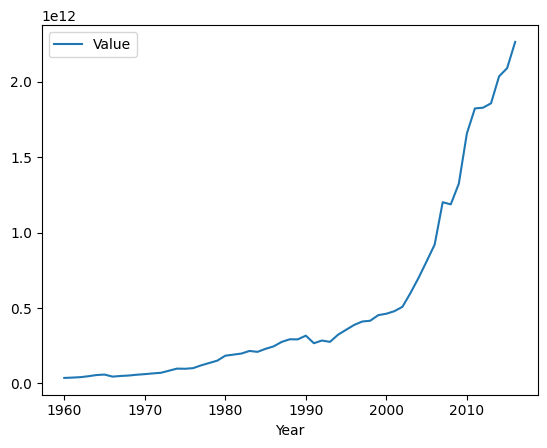

In [13]:
df_ind.plot(kind = 'line', x = 'Year', y = 'Value')

## What's the world GDP in 1969

In [14]:
df[(df['Year'] == 1969) & (df['Country Name'] == 'World')]

,Country Name,Country Code,Year,Value
2258,World,WLD,1969,2.690798e+12


## Whats the % of GDP growth of India in Year 1994 (*as compare to 1993)

In [15]:
round(((3.229099 - 2.755704) / 3.229099) * 100, 2)

14.66

## GDP Growth of India from 1960 - 2016

In [16]:
data = df_ind.values

gdp_ch = [0]

for i in range(1, len(data)):
  cur = data[i][3]
  prv = data[i - 1][3]
  gdp_ch.append(round((((cur - prv) / cur) * 100), 2))

df_ind_gdp_change = df_ind.assign(GDP = gdp_ch)

## Graph for GDP Growth of India from 1960 - 2016

<Axes: xlabel='Year', ylabel='GDP Change in %'>

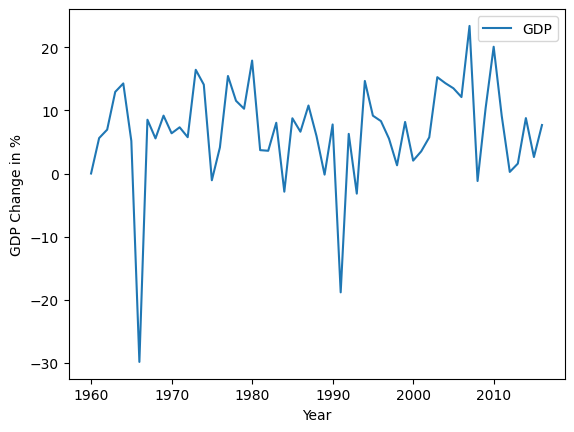

In [17]:
df_ind_gdp_change.plot(kind = 'line', x = 'Year', y = 'GDP', ylabel = 'GDP Change in %')

## GDP Growth for all the Countries

In [18]:
final_data = []

for country in df['Country Name'].unique():

  df_pr = df[df['Country Name'] == country]
  data = df_pr.values

  gdp_ch = [0]

  for i in range(1, len(data)):
    cur = data[i][3]
    prv = data[i - 1][3]
    gdp_ch.append(round((((cur - prv) / cur) * 100), 2))

  df_pr = df_pr.assign(GDP = gdp_ch)
  final_data.append(df_pr)

df = pd.concat(final_data)

In [19]:
df.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,9.40
2,Arab World,ARB,1970,3.138550e+10,9.40
3,Arab World,ARB,1971,3.642691e+10,13.84
4,Arab World,ARB,1972,4.331606e+10,15.90


## Graphs using Plotly

In [20]:
df_pr = df[df['Country Name'] == 'World']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'World GDP Analysis')

fig

In [21]:
pyo.plot(fig, filename = 'World GDP.html')

'World GDP.html'

In [22]:
df_pr = df[df['Country Name'] == 'India']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'Indian GDP Analysis')

fig

In [23]:
pyo.plot(fig, filename = 'Indian GDP.html')

'Indian GDP.html'

## GDP of all countries

In [27]:
fig = px.line(df, x = 'Year', y = 'Value', title = 'World-Wide GDP Analysis', color = 'Country Name')

pyo.plot(fig, filename = 'World-wide GDP.html')

'World-wide GDP.html'

GDP Comparison between India and USA

In [33]:
c1 = df[df['Country Name'] == 'India']
c2 = df[df['Country Name'] == 'United States']

df_pr = pd.concat((c1, c2), axis = 0)

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'India vs United States GDP Analysis', color = 'Country Name')

pyo.plot(fig, filename = 'IND|USA GDP.html')

'IND|USA GDP.html'

Function for GDP Comparison between Countries

In [66]:
def gdp_cmp_countries(lst):

  dfs = []
  for i in lst:
    dfs.append(df[df['Country Code'] == i])

    df_pr = pd.concat(dfs, axis = 0)

  fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Analysis - ' + '|'.join(lst), color = 'Country Name')
  pyo.plot(fig, filename = '|'.join(lst) + ' - GDP.html')

In [67]:
gdp_cmp_countries(['IND', 'ITA', 'SGP'])